In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define exact colors for each category
colors = ["#FF0000", "#00FF00", "#0000FF"]
colors = ["blue", "red", "lightgrey"]
custom_cmap = ListedColormap(colors)

def plot_results(axes, results_df, llr_top_mean_activity, dataset):

    rounds = results_df["round_num"].astype(int)
    axes.errorbar(rounds, results_df["mean_score"],
                  yerr=results_df["stddev"], fmt='-o', capsize=5, label='Active Learning')
    axes.set_title(f'{dataset}', fontsize=16)
    axes.set_ylabel('Mean Activity', fontsize=14)
    axes.set_xlabel('Round', fontsize=14)
    axes.set_xticks(rounds)
    # Add horizontal dashed line for LLR
    axes.axhline(llr_top_mean_activity, color='black', linestyle='--', label='Log Likelihood Ratio')
    axes.legend()
    # plt.colorbar(scatter, ax=axes, label="Label")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
datasets = [
    "ADRB2",
    "AICDA",
    "BRCA1",
    "BRCA2",
    "CALM1",
    "CAR11",
    "CASP3",
    "CASP7",
    "CBS",
    "GDIA",
    "GRB2",
    "HEM3",
    "HMDH",
    "HXK4",
    "KCNE1",
    "KCNH2",
    "MET",
    "MK01",
    "MSH2",
    "MTHR",
    "NPC1",
    "OTC",
    "P53",
    "PAI1",
    "PPARG",
    "PPM1D",
    "PTEN",
    "RAF1",
    "RASH",
    "S22A1",
    "SC6A4",
    "SCN5A",
    "SERC",
    "SHOC2",
    "SRC",
    "SUMO1",
    "SYUA",
    "TADBP",
    "TPK1",
    "TPOR",
    "UBC9",
    "VKOR1",
    "brenan",
    "cas12f",
    "cov2_S",
    "doud",
    "giacomelli",
    "haddox",
    "jones",
    "kelsic",
    "lee",
    "markin",
    "stiffler",
    "zikv_E"]


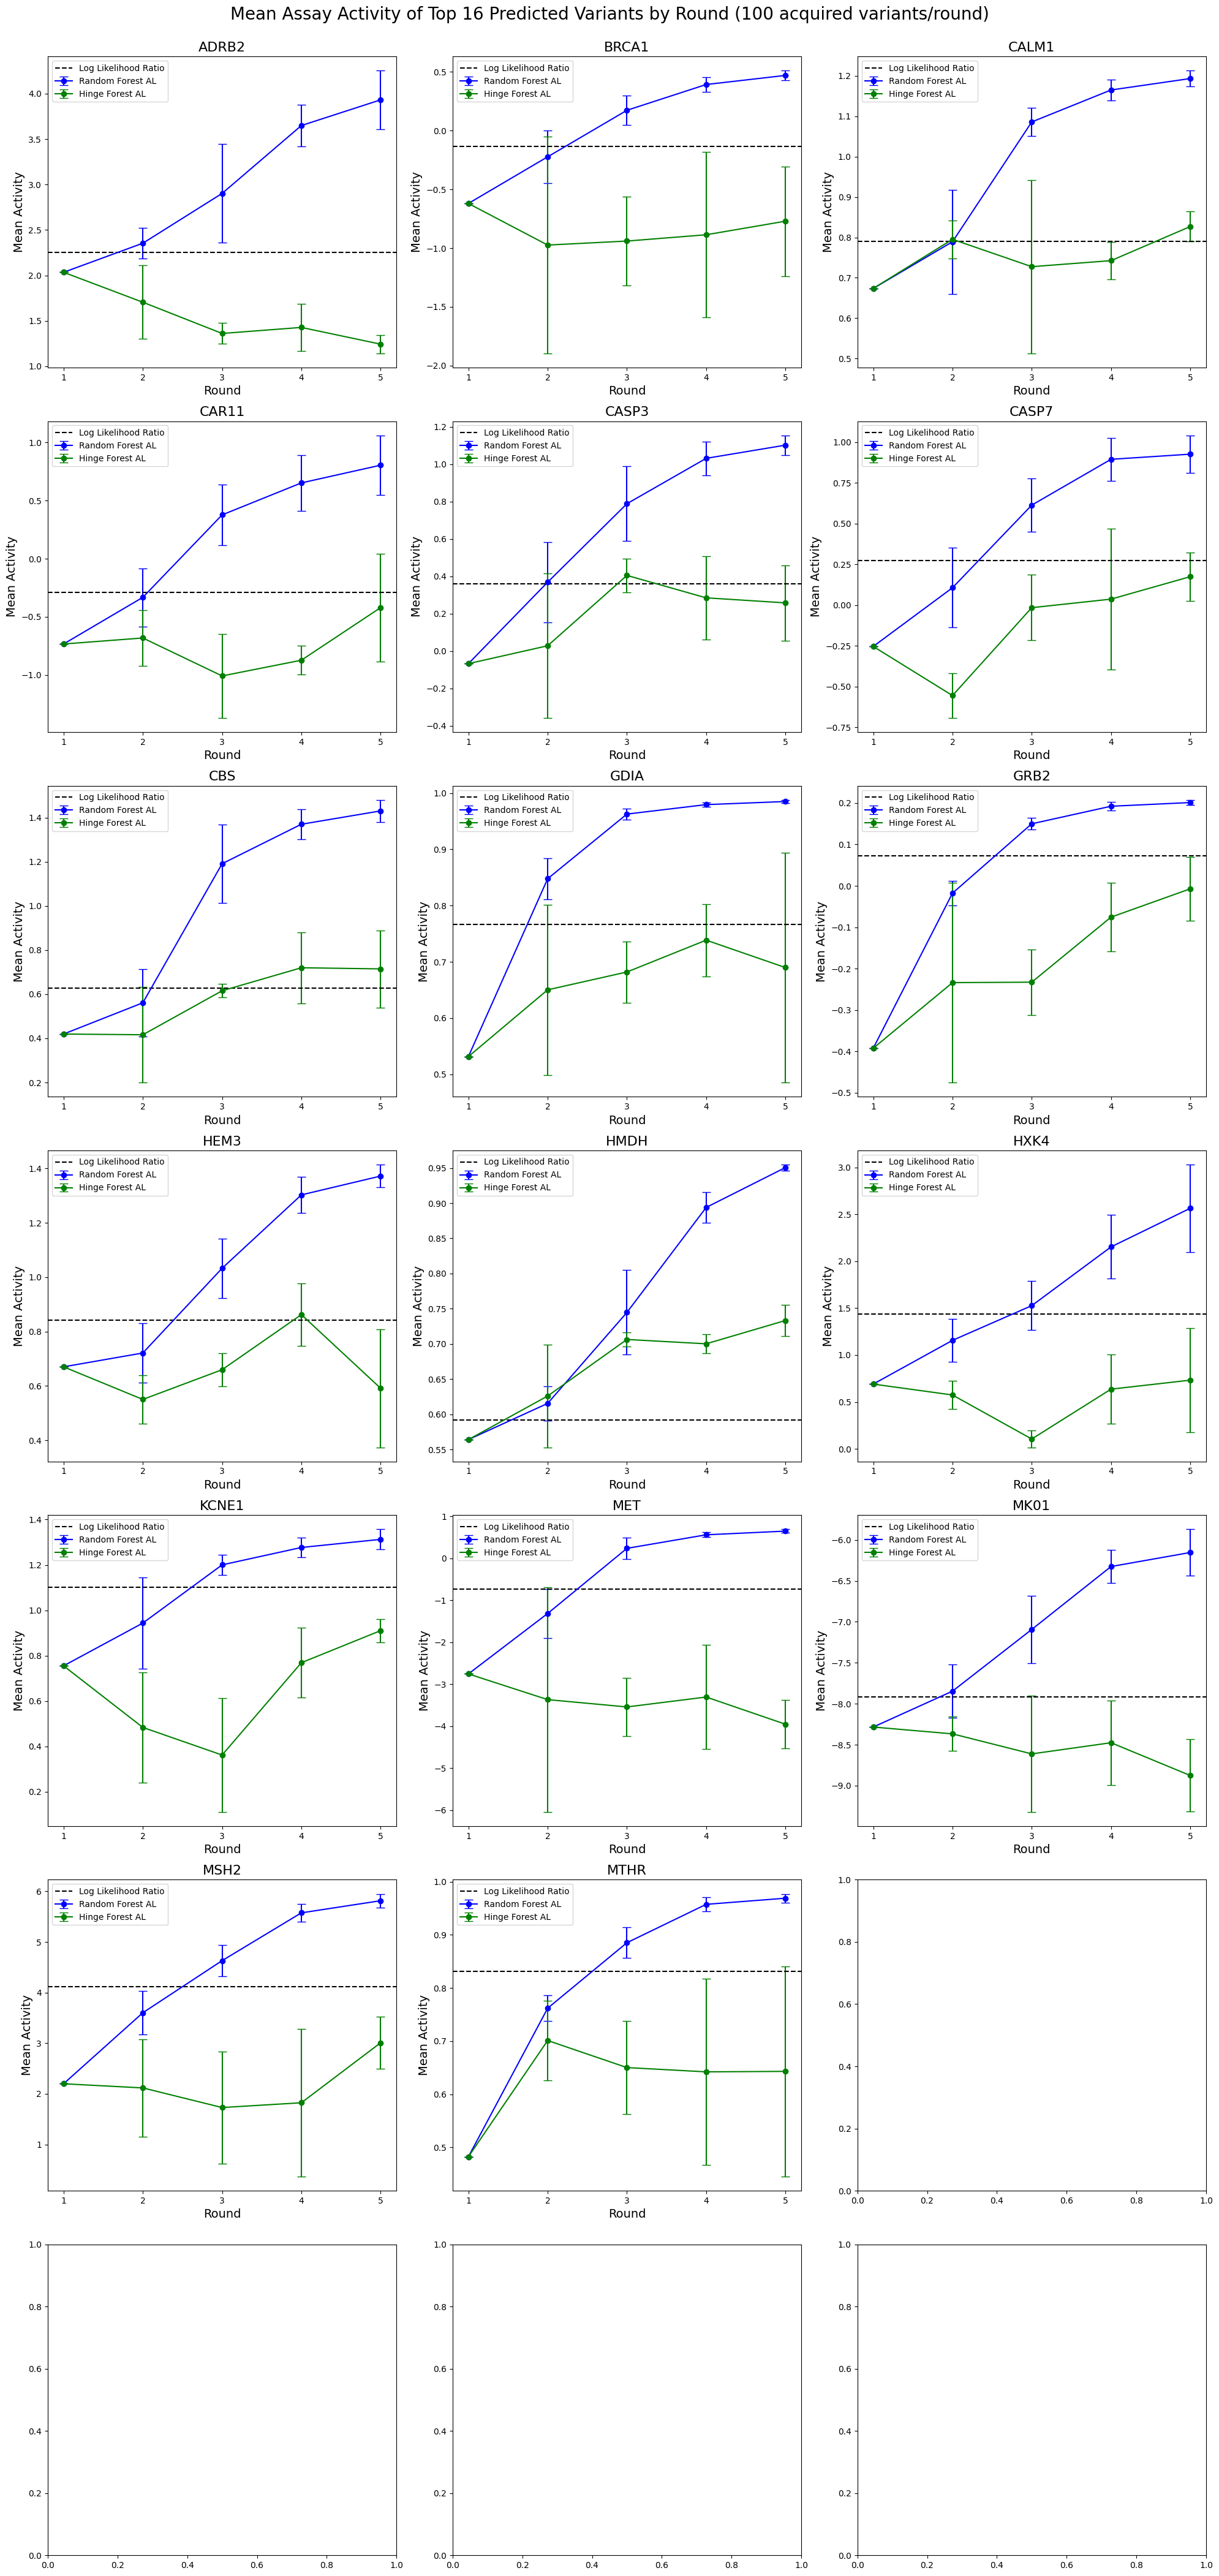

In [2]:
import context  # noqa: F401
import matplotlib.pyplot as plt
from msalde.container import ALDEContainer
from notebooks.analysis_plotter import DATASETS

def show_plots():

    # datasets = ["cas12f2"]
    container = ALDEContainer("./config/msaldem.yaml")
    # container = ALDEContainer("./config/msalde.yaml")
    repo = container.query_repository
    plotter = container.plotter

    datasets = DATASETS
    datasets_ = datasets[:20]
    # datasets_ = ["cas12f2"]

    num_rows = len(datasets_) // 3 + int(len(datasets_) % 3 > 0)

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))
    axes = axes.flatten()
    ind = 0

    for dataset in datasets_:
        llr_results = repo.get_mean_activity_of_top_variants_by_round(
            config_id="c10", dataset_name=dataset, run_name="ESM2_LLR")
        if len(llr_results) == 0:
            continue
        llr_results = llr_results[llr_results["round_num"] == 2]
        llr_top_mean_activity = llr_results["mean_score"].values[0]
        results = repo.get_mean_activity_of_top_variants_by_round(
            config_id="c3_1", dataset_name=dataset, run_name="RF_AL")
        if len(results) == 0:
            continue
        results_list = [results]
        labels = ['Random Forest AL']
        results = repo.get_mean_activity_of_top_variants_by_round(
            config_id="c9_3", dataset_name=dataset, run_name="ESM2_HF")
        if len(results) == 0:
            continue
        results_list.append(results)
        labels.append('Hinge Forest AL')
        plotter.plot_mean_activity_by_round(axes[ind], results_list, labels, llr_top_mean_activity, dataset)
        #
        ind += 1

    # plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle('Mean Assay Activity of Top 16 Predicted Variants by Round (100 acquired variants/round)', fontsize=20, y=1.0)
    plt.tight_layout()
    plt.show()

show_plots()

In [ ]:
import context  # noqa: F401
import matplotlib.pyplot as plt
from msalde.container import ALDEContainer
from notebooks.analysis_plotter import DATASETS

def show_plots():

    # datasets = ["cas12f2"]
    container = ALDEContainer("./config/msaldem.yaml")
    container = ALDEContainer("./config/msalde.yaml")
    repo = container.query_repository
    plotter = container.plotter

    datasets = DATASETS
    datasets_ = datasets[:20]
    # datasets_ = ["cas12f2"]

    num_rows = len(datasets_) // 3 + int(len(datasets_) % 3 > 0)

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))
    axes = axes.flatten()
    ind = 0

    results = repo.get_mean_activity_of_top_variants_by_round(
            config_id="c3_3", dataset_name="cas12f2", run_name="RF_AL_MS")
    pass

show_plots()

/home/claudiof/gitrepo/msalde/venv_msalde/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
